# Objective: Forest vs Building Classification Using ANN

Steps:
1. Importing (or installing) Tenosrflow, Keras and other packages on your system
2. Loading your data from disk
3. Creating your training and testing splits
4. Data Preprocessing 
5. Defining your tensorflow ANN model architecture
6. Compiling your tensorflow ANN model
7. Training your model on your training data
8. Evaluating your model on your test data
9. Generate Plots for accuracy and validation loss
10. Saving The train model
11. Making predictions using your trained tensorflow model

### Step 1: Importing all the packages

In [1]:
# Import libraries and packages
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

warnings.filterwarnings("ignore")
SEED = 42   # set random seed

### Step 2: Loading your data from disk for training

In [ ]:
# # mount google drive to collab notebook
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # change working DIR 
# import os 
# os.chdir("/content/drive/MyDrive/Imarticus_Deep_learning_B2/DAY_1_ANN")

In [ ]:
# Extract dataset.rar file
# !pip install patool

In [ ]:
# import patoolib
# patoolib.extract_archive("dataset.rar")

In [ ]:
# patoolib.extract_archive("test_examples.rar")

In [ ]:
!dir

In [2]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []
labels = []

classes = ["Forest", "Buildings"]

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('dataset')))   # data folder with 2 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
        # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)

        # extract the class label from the image path and update the labels list
        label = imagePath.split(os.path.sep)[-2]
        
        label = 1 if label == "Buildings" else 0
        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...


  0%|          | 0/883 [00:00<?, ?it/s]

Time taken: 1.3 seconds
done


In [3]:
print("Total Images: ", len(data))

Total Images:  883


In [4]:
# sample data for first image
print("sample image: {}".format(data[0]))
print("no of features/pixels values: {}".format(len(data[0]))) # 32x32x3=3072
print("label: {}".format(classes[labels[0]]))

sample image: [0.31764706 0.29803922 0.28627451 ... 0.74117647 0.58823529 0.4627451 ]
no of features/pixels values: 3072
label: Forest


### Step 3: Creating your training and testing splits

In [6]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

In [7]:
trainX.shape  

(706, 3072)

In [8]:
trainY.shape

(706,)

In [9]:
testX.shape

(177, 3072)

In [10]:
testY.shape

(177,)

In [11]:
trainX

array([[0.20392157, 0.57254902, 0.34509804, ..., 0.00784314, 0.17254902,
        0.07843137],
       [0.85490196, 0.87843137, 0.95686275, ..., 0.        , 0.        ,
        0.01176471],
       [0.76862745, 0.77254902, 0.78039216, ..., 0.44313725, 0.46666667,
        0.48627451],
       ...,
       [0.88235294, 0.87058824, 0.80392157, ..., 0.21960784, 0.19215686,
        0.23137255],
       [0.84313725, 0.78823529, 0.79215686, ..., 0.3372549 , 0.36862745,
        0.62745098],
       [0.02352941, 0.35686275, 0.17254902, ..., 0.09411765, 0.28627451,
        0.21568627]])

In [12]:
trainY

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [13]:
type(trainY)

numpy.ndarray

In [14]:
testY

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1])

### Step 4: Data Preprocessing 

In [15]:
# convert the labels from integers/categories to vectors 

trainY = to_categorical(trainY, num_classes=2)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = to_categorical(testY, num_classes=2)     # transform = perform the one-hot encoding (unique class labels already found)

# [0,1] Buildings
# [1,0] Forest

In [16]:
# testY

In [17]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [18]:
sample_image = (trainX[5] * 255).astype("int")

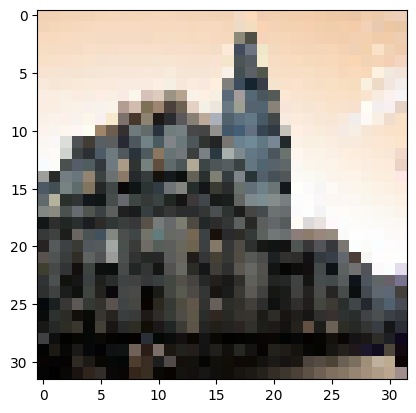

In [19]:
plt.imshow(sample_image.reshape(32,32,3))

In [20]:
trainY[5]   # [0,1] means buildings [1,0] means forest

array([0., 1.], dtype=float32)

### Step 5:  Define the architecture for ANN MODEL

In [21]:
# define the 3072-1024-512-1 architecture using Keras

model = Sequential()   

# input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
# first hidden layer has 1024 nodes
model.add(Dense(units= 1024, input_shape=(3072,), kernel_initializer = 'uniform', activation="relu"))  

# # dropout for second layer 
# model.add(Dropout(0.4))

# second hidden layer has 512 nodes
model.add(Dense(units=512, kernel_initializer='uniform', activation="relu"))                         

 # output layer with number of possible class labels
model.add(Dense(units=2,kernel_initializer='uniform', activation="softmax"))           

## Compile Model

![image.png](attachment:image.png)

### Step 6:  Compiling your tensorflow ANN model

In [22]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 50
 
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] compiling network network...")
opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling network network...


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 3,672,578
Trainable params: 3,672,578
Non-trainable params: 0
_________________________________________________________________


### Step 7: Training your model on your training data

#### Fit (ie, Train) model

In [24]:
# train the neural network on training data set
# batch_size (32) controls the size of each group of data to pass through the network. 

time1 = time.time()   # to measure time taken
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - ETA: 0s - loss: 0.6511 - accuracy: 0.5567WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000028837F8BAF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

23/23 [==============================] - 1s 29ms/step - loss: 0.2042 - accuracy: 0.9306 - val_loss: 0.3777 - val_accuracy: 0.8362
Epoch 46/50
23/23 [==============================] - 1s 26ms/step - loss: 0.1944 - accuracy: 0.9419 - val_loss: 0.5694 - val_accuracy: 0.7458
Epoch 47/50
23/23 [==============================] - 1s 28ms/step - loss: 0.1955 - accuracy: 0.9391 - val_loss: 0.3084 - val_accuracy: 0.8757
Epoch 48/50
23/23 [==============================] - 1s 27ms/step - loss: 0.1794 - accuracy: 0.9504 - val_loss: 0.6679 - val_accuracy: 0.7740
Epoch 49/50
23/23 [==============================] - 1s 29ms/step - loss: 0.2024 - accuracy: 0.9334 - val_loss: 0.3594 - val_accuracy: 0.8475
Epoch 50/50
23/23 [==============================] - 1s 29ms/step - loss: 0.1610 - accuracy: 0.9618 - val_loss: 0.4774 - val_accuracy: 0.8249
Time taken: 43.3 seconds


### Step 8: Evaluating your model on your test data 

![image.png](attachment:image.png)

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
pred_prob = model.predict(testX, batch_size=32)

In [ ]:
pred_prob

In [ ]:
9.25910056e-01

In [ ]:
9.6146774e-01

In [ ]:
# testY

### Convert testY and y_pred into 1's and 0 for classification report


In [ ]:
# Note: buildings -> 1 and forest -> 0

In [ ]:
test_y = [ np.argmax(i)  for i in testY]
pred_y = [ np.argmax(i)  for i in pred_prob]

In [ ]:
# test_y

In [ ]:
pred_y

In [ ]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

In [ ]:
plot_confusion_metrix(test_y, pred_y,classes=["Forest: 0","Buildings: 1"])

### Step 9: Generate Plots for acc and val 

In [ ]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [ ]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [ ]:
# accuracy = 88%

### Step 10: Saving the train model 

In [ ]:
model.summary()

In [ ]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('model_ANN.h5')


### Step 11: Making predictions using your trained tensorflow model

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# # load the model 
# print("[INFO] loading network and...")
# model2 = load_model("model_ANN.h5")

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
# load the input image and resize it to the target spatial dimensions
width = 32
height = 32

# grab the image paths and randomly shuffle them
testImagePaths = sorted(list(paths.list_images('test_examples')))   # test data folder with random images


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        image = cv2.imread(imagePath)
        output = image.copy()
        image = cv2.resize(image, (width, height))

        # scale the pixel values to [0, 1]
        image = image.astype("float") / 255.0

        # for a simple fully-connected network, flatten the image
        image = image.flatten()
        image = image.reshape((1, image.shape[0]))


        # make a prediction on the image
        preds = model.predict(image)

        # find the class label index with the largest corresponding probability
        i = preds.argmax(axis=1)[0]
        label = classes[i]
        
        label = "{}: {:.2f}%".format(label, preds[0][i] * 100)

        
        output = imutils.resize(output, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 255, 0), 2)
        
        # convert img to rgb format and display in noteboo
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

#         print("############################")
#         print("image: {}".format(os.path.split(imagePath)[-1]))
#         print("predicted label: {}".format(label))
#         print("Confidence: {}".format(preds[0][i]))
        
        pbar.update(1)

## Deployment

In [ ]:
# !pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def predict_image(image):
    
    image = cv2.resize(image, (32, 32))

    # scale the pixel values to [0, 1]
    image = image.astype("float") / 255.0

    # for a simple fully-connected network, flatten the image
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))

    # make a prediction on the image
    preds = model.predict(image).flatten()
    result = dict()
    result["Forest"] = round(float(list(preds)[0]), 3)
    result["Buildings"] = round(float(list(preds)[1]), 3)
    print(result)
    
    return result

im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="ANN Demo").launch(share=True)